In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv("/content/drive/MyDrive/IDSIA Biomedical Texts/Tweets Project/tweets_emotions_with_labels.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,label
0,0.000059,0.000267,0.001160,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.082093,0.000126,0.001421,0.002678,0.001155,0.012150,0.010215,0.000147,0.002682,PP
1,0.000160,0.000063,0.001678,0.000607,0.001919,0.930200,0.000352,0.000144,0.000059,0.000139,...,0.004161,0.001674,0.000115,0.000235,0.005173,0.000314,0.000201,0.000157,0.003289,PONP
2,0.000535,0.000172,0.000043,0.000637,0.706703,0.001081,0.000261,0.000408,0.001219,0.000122,...,0.001282,0.056095,0.000529,0.027748,0.003876,0.000125,0.000080,0.000223,0.189041,PP
3,0.000313,0.000563,0.000073,0.001056,0.066868,0.000340,0.000805,0.000177,0.000083,0.002363,...,0.007173,0.004606,0.000059,0.134053,0.000484,0.000094,0.001890,0.003335,0.761554,PONP
4,0.000105,0.000022,0.000070,0.000051,0.000550,0.988513,0.000092,0.000182,0.000086,0.000019,...,0.000077,0.000662,0.000011,0.000057,0.000980,0.000103,0.000058,0.000054,0.007397,PONP


In [4]:
df_labels = df['label']
df_labels

0        PP
1      PONP
2        PP
3      PONP
4      PONP
       ... 
155    PONP
156      PP
157    PONP
158      PP
159      PP
Name: label, Length: 160, dtype: object

In [5]:
df.drop('label', axis=1, inplace=True)
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.000059,0.000267,0.001160,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.000275,0.082093,0.000126,0.001421,0.002678,0.001155,0.012150,0.010215,0.000147,0.002682
1,0.000160,0.000063,0.001678,0.000607,0.001919,0.930200,0.000352,0.000144,0.000059,0.000139,...,0.000232,0.004161,0.001674,0.000115,0.000235,0.005173,0.000314,0.000201,0.000157,0.003289
2,0.000535,0.000172,0.000043,0.000637,0.706703,0.001081,0.000261,0.000408,0.001219,0.000122,...,0.000056,0.001282,0.056095,0.000529,0.027748,0.003876,0.000125,0.000080,0.000223,0.189041
3,0.000313,0.000563,0.000073,0.001056,0.066868,0.000340,0.000805,0.000177,0.000083,0.002363,...,0.000069,0.007173,0.004606,0.000059,0.134053,0.000484,0.000094,0.001890,0.003335,0.761554
4,0.000105,0.000022,0.000070,0.000051,0.000550,0.988513,0.000092,0.000182,0.000086,0.000019,...,0.000058,0.000077,0.000662,0.000011,0.000057,0.000980,0.000103,0.000058,0.000054,0.007397


In [6]:
columns = list(df.columns)

# new col to store all emotions and their prob for every row in dictionary form
df["emo_label_prob"] = [{} for _ in range(len(df))]

# Iterate over each row and populate the dictionary in the "emo_label_prob"
for index, row in df.iterrows():
    probabilities = row[columns].to_dict()
    df.at[index, "emo_label_prob"] = probabilities

df

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,emo_label_prob
0,0.000059,0.000267,0.001160,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.082093,0.000126,0.001421,0.002678,0.001155,0.012150,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0..."
1,0.000160,0.000063,0.001678,0.000607,0.001919,0.930200,0.000352,0.000144,0.000059,0.000139,...,0.004161,0.001674,0.000115,0.000235,0.005173,0.000314,0.000201,0.000157,0.003289,"{'admiration': 0.00016007239, 'amusement': 6.3..."
2,0.000535,0.000172,0.000043,0.000637,0.706703,0.001081,0.000261,0.000408,0.001219,0.000122,...,0.001282,0.056095,0.000529,0.027748,0.003876,0.000125,0.000080,0.000223,0.189041,"{'admiration': 0.000534939, 'amusement': 0.000..."
3,0.000313,0.000563,0.000073,0.001056,0.066868,0.000340,0.000805,0.000177,0.000083,0.002363,...,0.007173,0.004606,0.000059,0.134053,0.000484,0.000094,0.001890,0.003335,0.761554,"{'admiration': 0.0003127861, 'amusement': 0.00..."
4,0.000105,0.000022,0.000070,0.000051,0.000550,0.988513,0.000092,0.000182,0.000086,0.000019,...,0.000077,0.000662,0.000011,0.000057,0.000980,0.000103,0.000058,0.000054,0.007397,"{'admiration': 0.000105462284, 'amusement': 2...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.002664,0.000210,0.000016,0.000250,0.829980,0.002634,0.001490,0.032728,0.001017,0.000189,...,0.001801,0.006197,0.000067,0.037984,0.001325,0.000064,0.000126,0.007467,0.047769,"{'admiration': 0.0026642256, 'amusement': 0.00..."
156,0.000013,0.000076,0.000474,0.000917,0.000119,0.000508,0.003064,0.990775,0.000101,0.000622,...,0.000031,0.000036,0.000002,0.000042,0.000016,0.000619,0.001194,0.000117,0.000604,"{'admiration': 1.2816753e-05, 'amusement': 7.6..."
157,0.000087,0.000111,0.000689,0.000157,0.001138,0.981478,0.000224,0.000403,0.000247,0.000048,...,0.000302,0.000747,0.000010,0.000073,0.000195,0.000324,0.001371,0.000064,0.002102,"{'admiration': 8.681e-05, 'amusement': 0.00011..."
158,0.000231,0.000260,0.000421,0.002901,0.445039,0.001604,0.000474,0.000166,0.000227,0.003454,...,0.388653,0.005346,0.000743,0.066871,0.002721,0.000558,0.002566,0.002660,0.009144,"{'admiration': 0.00023126583, 'amusement': 0.0..."


In [7]:
df['label'] = df_labels
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,emo_label_prob,label
0,0.000059,0.000267,0.001160,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.000126,0.001421,0.002678,0.001155,0.012150,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP
1,0.000160,0.000063,0.001678,0.000607,0.001919,0.930200,0.000352,0.000144,0.000059,0.000139,...,0.001674,0.000115,0.000235,0.005173,0.000314,0.000201,0.000157,0.003289,"{'admiration': 0.00016007239, 'amusement': 6.3...",PONP
2,0.000535,0.000172,0.000043,0.000637,0.706703,0.001081,0.000261,0.000408,0.001219,0.000122,...,0.056095,0.000529,0.027748,0.003876,0.000125,0.000080,0.000223,0.189041,"{'admiration': 0.000534939, 'amusement': 0.000...",PP
3,0.000313,0.000563,0.000073,0.001056,0.066868,0.000340,0.000805,0.000177,0.000083,0.002363,...,0.004606,0.000059,0.134053,0.000484,0.000094,0.001890,0.003335,0.761554,"{'admiration': 0.0003127861, 'amusement': 0.00...",PONP
4,0.000105,0.000022,0.000070,0.000051,0.000550,0.988513,0.000092,0.000182,0.000086,0.000019,...,0.000662,0.000011,0.000057,0.000980,0.000103,0.000058,0.000054,0.007397,"{'admiration': 0.000105462284, 'amusement': 2....",PONP


## Plotting Emotions vs Frequency

In [8]:
import operator

In [9]:
sorted(df['emo_label_prob'][0].items(), key=operator.itemgetter(1),reverse=True)[:5]

[('embarrassment', 0.7947152),
 ('nervousness', 0.082092695),
 ('fear', 0.033814367),
 ('disappointment', 0.02453797),
 ('annoyance', 0.023138843)]

In [10]:
df['emo_label_prob'].apply( lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True)[:5] )

0      [(embarrassment, 0.7947152), (nervousness, 0.0...
1      [(caring, 0.93020034), (fear, 0.04762121), (re...
2      [(approval, 0.7067033), (neutral, 0.18904075),...
3      [(neutral, 0.7615538), (realization, 0.1340531...
4      [(caring, 0.9885125), (neutral, 0.007396732), ...
                             ...                        
155    [(approval, 0.82997984), (neutral, 0.047768757...
156    [(curiosity, 0.9907747), (confusion, 0.0030644...
157    [(caring, 0.9814777), (fear, 0.0071420358), (g...
158    [(approval, 0.4450394), (nervousness, 0.388653...
159    [(nervousness, 0.6780295), (realization, 0.227...
Name: emo_label_prob, Length: 160, dtype: object

In [11]:
df['top_five_emolabelprob'] = df['emo_label_prob'].apply( lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True)[:5] )
df.head(1)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,pride,realization,relief,remorse,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob
0,0.000059,0.000267,0.00116,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.001421,0.002678,0.001155,0.01215,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP,"[(embarrassment, 0.7947152), (nervousness, 0.0..."


In [12]:
df['topfive_emo_labels'] = df['top_five_emolabelprob'].apply( lambda x: list(dict(x).keys()))
df.head(1)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,realization,relief,remorse,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob,topfive_emo_labels
0,0.000059,0.000267,0.00116,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.002678,0.001155,0.01215,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP,"[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm..."


In [13]:
topfive_emo_label_list = []

for row in df['topfive_emo_labels']:
    topfive_emo_label_list.extend(row)

In [14]:
print(topfive_emo_label_list)

['embarrassment', 'nervousness', 'fear', 'disappointment', 'annoyance', 'caring', 'fear', 'relief', 'nervousness', 'neutral', 'approval', 'neutral', 'optimism', 'realization', 'joy', 'neutral', 'realization', 'approval', 'fear', 'nervousness', 'caring', 'neutral', 'relief', 'optimism', 'approval', 'nervousness', 'approval', 'caring', 'neutral', 'fear', 'fear', 'nervousness', 'disappointment', 'sadness', 'annoyance', 'fear', 'sadness', 'nervousness', 'caring', 'disgust', 'realization', 'nervousness', 'fear', 'annoyance', 'anger', 'fear', 'nervousness', 'caring', 'approval', 'neutral', 'neutral', 'approval', 'realization', 'disapproval', 'optimism', 'realization', 'neutral', 'approval', 'optimism', 'disapproval', 'sadness', 'fear', 'neutral', 'nervousness', 'disappointment', 'neutral', 'approval', 'sadness', 'realization', 'amusement', 'anger', 'annoyance', 'amusement', 'fear', 'caring', 'neutral', 'confusion', 'curiosity', 'surprise', 'amusement', 'nervousness', 'approval', 'fear', 'rel

In [15]:
len(topfive_emo_label_list)

800

In [16]:
160*5

800

In [17]:
from collections import Counter

counts = Counter(topfive_emo_label_list)

for value, count in counts.items():
    print(f"{value}: {count}")

embarrassment: 2
nervousness: 90
fear: 107
disappointment: 34
annoyance: 39
caring: 41
relief: 21
neutral: 82
approval: 79
optimism: 25
realization: 47
joy: 6
sadness: 64
disgust: 8
anger: 21
disapproval: 12
amusement: 12
confusion: 25
curiosity: 29
surprise: 12
desire: 4
excitement: 14
grief: 9
pride: 2
admiration: 6
gratitude: 5
love: 3
remorse: 1


In [18]:
counts

Counter({'embarrassment': 2,
         'nervousness': 90,
         'fear': 107,
         'disappointment': 34,
         'annoyance': 39,
         'caring': 41,
         'relief': 21,
         'neutral': 82,
         'approval': 79,
         'optimism': 25,
         'realization': 47,
         'joy': 6,
         'sadness': 64,
         'disgust': 8,
         'anger': 21,
         'disapproval': 12,
         'amusement': 12,
         'confusion': 25,
         'curiosity': 29,
         'surprise': 12,
         'desire': 4,
         'excitement': 14,
         'grief': 9,
         'pride': 2,
         'admiration': 6,
         'gratitude': 5,
         'love': 3,
         'remorse': 1})

In [19]:
#a = dict(counts)
a = dict(sorted(dict(counts).items(), key=operator.itemgetter(1),reverse=True))
a

{'fear': 107,
 'nervousness': 90,
 'neutral': 82,
 'approval': 79,
 'sadness': 64,
 'realization': 47,
 'caring': 41,
 'annoyance': 39,
 'disappointment': 34,
 'curiosity': 29,
 'optimism': 25,
 'confusion': 25,
 'relief': 21,
 'anger': 21,
 'excitement': 14,
 'disapproval': 12,
 'amusement': 12,
 'surprise': 12,
 'grief': 9,
 'disgust': 8,
 'joy': 6,
 'admiration': 6,
 'gratitude': 5,
 'desire': 4,
 'love': 3,
 'embarrassment': 2,
 'pride': 2,
 'remorse': 1}

In [20]:
x = list(a.keys())
print(x)

['fear', 'nervousness', 'neutral', 'approval', 'sadness', 'realization', 'caring', 'annoyance', 'disappointment', 'curiosity', 'optimism', 'confusion', 'relief', 'anger', 'excitement', 'disapproval', 'amusement', 'surprise', 'grief', 'disgust', 'joy', 'admiration', 'gratitude', 'desire', 'love', 'embarrassment', 'pride', 'remorse']


In [21]:
y = list(a.values())
print(y)

[107, 90, 82, 79, 64, 47, 41, 39, 34, 29, 25, 25, 21, 21, 14, 12, 12, 12, 9, 8, 6, 6, 5, 4, 3, 2, 2, 1]


In [22]:
len(a), len(x), len(y)

(28, 28, 28)

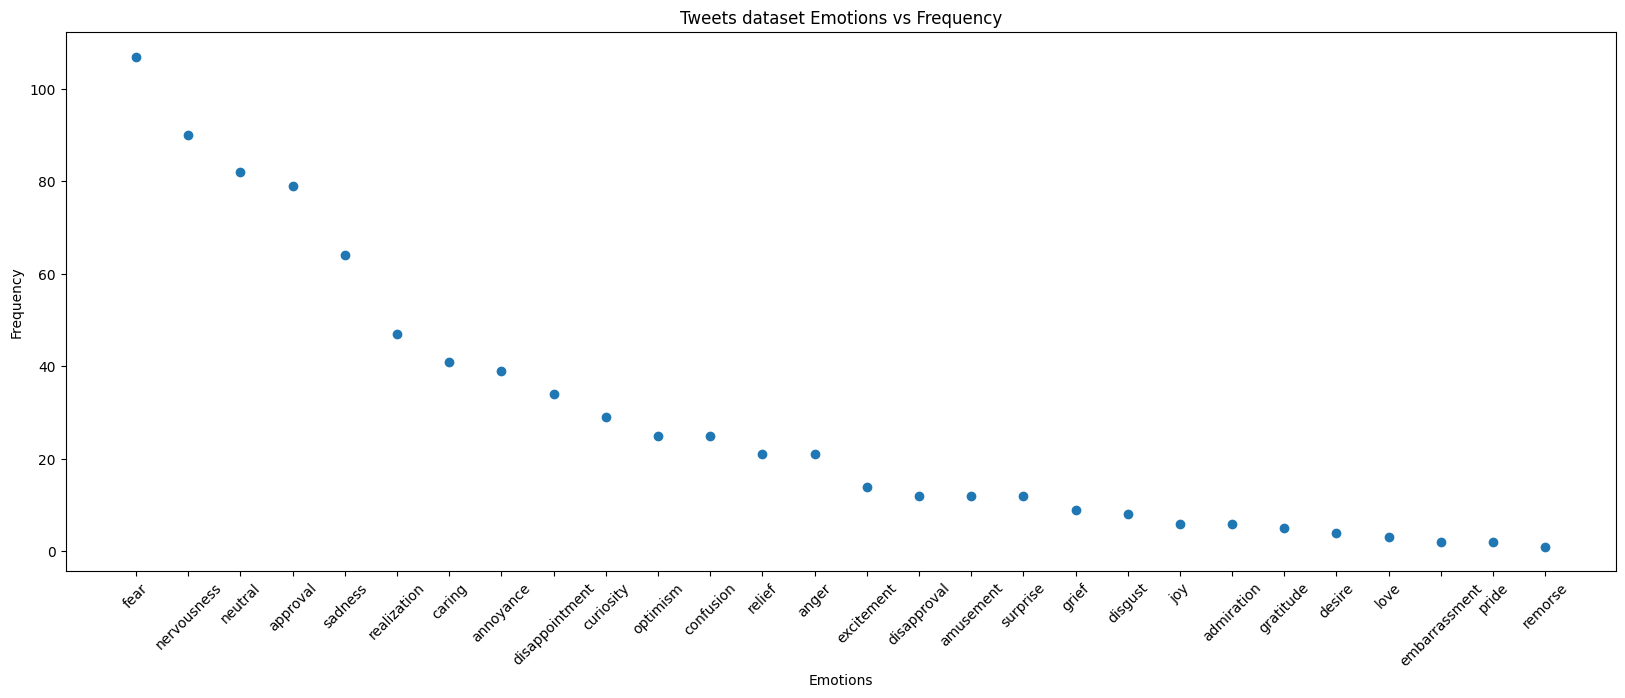

In [23]:
plt.figure(figsize=(20,7))
plt.title('Tweets dataset Emotions vs Frequency')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.scatter(x, y)
plt.xticks(rotation=45)
plt.show()

## Plotting emotions vs frequency for each label

In [24]:
df['label'].value_counts()

PP      94
PONP    59
UN       7
Name: label, dtype: int64

In [25]:
df[df['label'] == 'UN']

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,realization,relief,remorse,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob,topfive_emo_labels
53,0.000066,0.000240,0.000198,0.001758,0.492633,0.008601,0.002122,0.002593,0.000980,0.000875,...,0.008262,0.005875,0.000444,0.001344,0.000424,0.008452,"{'admiration': 6.645999e-05, 'amusement': 0.00...",UN,"[(approval, 0.49263278), (nervousness, 0.40781...","[approval, nervousness, fear, optimism, caring]"
59,0.000273,0.000276,0.000335,0.000678,0.034113,0.023533,0.004117,0.001329,0.000605,0.001987,...,0.002961,0.005279,0.000196,0.001771,0.004134,0.104235,"{'admiration': 0.00027310284, 'amusement': 0.0...",UN,"[(fear, 0.4374326), (nervousness, 0.36889622),...","[fear, nervousness, neutral, approval, caring]"
70,0.002923,0.000116,0.000427,0.000420,0.001127,0.000229,0.000078,0.000233,0.000064,0.000911,...,0.001262,0.000083,0.000045,0.000593,0.004002,0.983191,"{'admiration': 0.0029232895, 'amusement': 0.00...",UN,"[(neutral, 0.9831913), (surprise, 0.0040016673...","[neutral, surprise, admiration, excitement, re..."
82,0.002788,0.000021,0.000024,0.000166,0.003456,0.000795,0.008740,0.014113,0.000154,0.001706,...,0.000834,0.006868,0.000387,0.000113,0.000195,0.002042,"{'admiration': 0.0027875507, 'amusement': 2.12...",UN,"[(gratitude, 0.9549119), (curiosity, 0.0141134...","[gratitude, curiosity, confusion, relief, appr..."
91,0.009518,0.001613,0.628649,0.025337,0.002019,0.002504,0.000340,0.000138,0.000131,0.000176,...,0.000145,0.000150,0.000282,0.000151,0.000248,0.318987,"{'admiration': 0.009517771, 'amusement': 0.001...",UN,"[(anger, 0.6286494), (neutral, 0.318987), (ann...","[anger, neutral, annoyance, admiration, optimism]"
102,0.000102,0.001083,0.000155,0.000687,0.001745,0.004023,0.001448,0.241331,0.737967,0.000134,...,0.000201,0.000380,0.000207,0.000468,0.000327,0.001754,"{'admiration': 0.00010191639, 'amusement': 0.0...",UN,"[(desire, 0.73796713), (curiosity, 0.24133116)...","[desire, curiosity, caring, joy, neutral]"
106,0.000245,0.000068,0.000424,0.000611,0.009598,0.000047,0.000208,0.000094,0.000074,0.001093,...,0.001078,0.000011,0.000101,0.000676,0.000075,0.007488,"{'admiration': 0.00024531226, 'amusement': 6.7...",UN,"[(disapproval, 0.9768416), (approval, 0.009597...","[disapproval, approval, neutral, disappointmen..."


In [26]:
UN_label_list = []

for row in df[df['label'] == 'UN']['topfive_emo_labels']:
    UN_label_list.extend(row)

In [27]:
PONP_label_list = []

for row in df[df['label'] == 'PONP']['topfive_emo_labels']:
    PONP_label_list.extend(row)

In [28]:
PP_label_list = []

for row in df[df['label'] == 'PP']['topfive_emo_labels']:
    PP_label_list.extend(row)

In [29]:
UN_label_list, len(UN_label_list), 7*5

(['approval',
  'nervousness',
  'fear',
  'optimism',
  'caring',
  'fear',
  'nervousness',
  'neutral',
  'approval',
  'caring',
  'neutral',
  'surprise',
  'admiration',
  'excitement',
  'realization',
  'gratitude',
  'curiosity',
  'confusion',
  'relief',
  'approval',
  'anger',
  'neutral',
  'annoyance',
  'admiration',
  'optimism',
  'desire',
  'curiosity',
  'caring',
  'joy',
  'neutral',
  'disapproval',
  'approval',
  'neutral',
  'disappointment',
  'realization'],
 35,
 35)

In [30]:
UN_counts = Counter(UN_label_list)
PP_counts = Counter(PP_label_list)
PONP_counts = Counter(PONP_label_list)

In [31]:
UN_dict = dict(sorted(dict(UN_counts).items(), key=operator.itemgetter(1),reverse=True))
PP_dict = dict(sorted(dict(PP_counts).items(), key=operator.itemgetter(1),reverse=True))
PONP_dict = dict(sorted(dict(PONP_counts).items(), key=operator.itemgetter(1),reverse=True))

In [32]:
print(UN_dict)
print(PP_dict)
print(PONP_dict)

{'neutral': 5, 'approval': 4, 'caring': 3, 'nervousness': 2, 'fear': 2, 'optimism': 2, 'admiration': 2, 'realization': 2, 'curiosity': 2, 'surprise': 1, 'excitement': 1, 'gratitude': 1, 'confusion': 1, 'relief': 1, 'anger': 1, 'annoyance': 1, 'desire': 1, 'joy': 1, 'disapproval': 1, 'disappointment': 1}
{'fear': 75, 'nervousness': 66, 'sadness': 51, 'annoyance': 32, 'approval': 32, 'neutral': 28, 'realization': 27, 'disappointment': 25, 'confusion': 19, 'curiosity': 18, 'caring': 14, 'anger': 13, 'relief': 11, 'excitement': 11, 'disgust': 8, 'surprise': 7, 'amusement': 6, 'grief': 6, 'joy': 5, 'disapproval': 5, 'gratitude': 3, 'love': 3, 'embarrassment': 2, 'optimism': 1, 'pride': 1, 'admiration': 1}
{'neutral': 49, 'approval': 43, 'fear': 30, 'caring': 24, 'nervousness': 22, 'optimism': 22, 'realization': 18, 'sadness': 13, 'relief': 9, 'curiosity': 9, 'disappointment': 8, 'anger': 7, 'disapproval': 6, 'amusement': 6, 'annoyance': 6, 'confusion': 5, 'surprise': 4, 'desire': 3, 'admira

In [33]:
len(UN_dict), len(PP_dict), len(PONP_dict) # length not same, so not possible to make dataframe, we need to fill values with 0 where there are no emotions

(20, 26, 24)

In [34]:
print(UN_dict)

{'neutral': 5, 'approval': 4, 'caring': 3, 'nervousness': 2, 'fear': 2, 'optimism': 2, 'admiration': 2, 'realization': 2, 'curiosity': 2, 'surprise': 1, 'excitement': 1, 'gratitude': 1, 'confusion': 1, 'relief': 1, 'anger': 1, 'annoyance': 1, 'desire': 1, 'joy': 1, 'disapproval': 1, 'disappointment': 1}


In [35]:
import pandas as pd

#UN_dict = {'neutral': 5, 'approval': 4, 'caring': 3, 'nervousness': 2, 'fear': 2, 'optimism': 2, 'admiration': 2, 'realization': 2, 'curiosity': 2, 'surprise': 1, 'excitement': 1, 'gratitude': 1, 'confusion': 1, 'relief': 1, 'anger': 1, 'annoyance': 1, 'desire': 1, 'joy': 1, 'disapproval': 1, 'disappointment': 1}
#PP_dict = {'fear': 75, 'nervousness': 66, 'sadness': 51, 'annoyance': 32, 'approval': 32, 'neutral': 28, 'realization': 27, 'disappointment': 25, 'confusion': 19, 'curiosity': 18, 'caring': 14, 'anger': 13, 'relief': 11, 'excitement': 11, 'disgust': 8, 'surprise': 7, 'amusement': 6, 'grief': 6, 'joy': 5, 'disapproval': 5, 'gratitude': 3, 'love': 3, 'embarrassment': 2, 'optimism': 1, 'pride': 1, 'admiration': 1}
#PONP_dict = {'neutral': 49, 'approval': 43, 'fear': 30, 'caring': 24, 'nervousness': 22, 'optimism': 22, 'realization': 18, 'sadness': 13, 'relief': 9, 'curiosity': 9, 'disappointment': 8, 'anger': 7, 'disapproval': 6, 'amusement': 6, 'annoyance': 6, 'confusion': 5, 'surprise': 4, 'desire': 3, 'admiration': 3, 'grief': 3, 'excitement': 2, 'pride': 1, 'gratitude': 1, 'remorse': 1}

# Get the unique set of keys from all dictionaries
all_keys = set(UN_dict.keys()).union(PP_dict.keys(), PONP_dict.keys())  # get all emotions (keys) common in all 3

# Create a dictionary with the combined data
combined_dict = {
    "Emotions": list(all_keys),
    "UN": [UN_dict.get(key, 0) for key in all_keys],  # Put value if key is present else put 0
    "PP": [PP_dict.get(key, 0) for key in all_keys],
    "PONP": [PONP_dict.get(key, 0) for key in all_keys]
}

# Create the DataFrame
freq_df = pd.DataFrame(combined_dict)

# Print the DataFrame
freq_df

,Emotions,UN,PP,PONP
0,neutral,5,28,49
1,optimism,2,1,22
2,gratitude,1,3,1
3,love,0,3,0
4,amusement,0,6,6
5,approval,4,32,43
6,grief,0,6,3
7,annoyance,1,32,6
8,anger,1,13,7
9,admiration,2,1,3


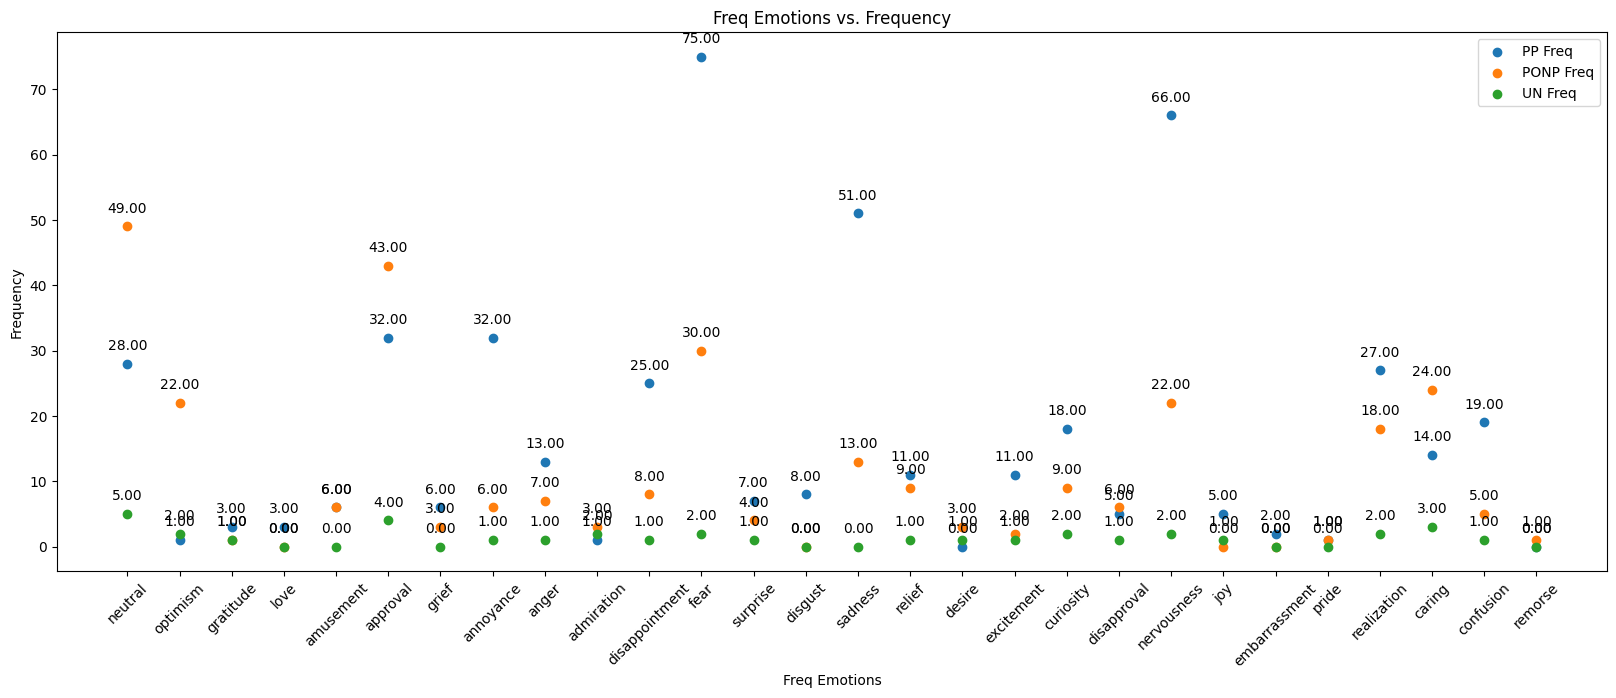

In [36]:
x = freq_df['Emotions']
y_PP = freq_df['PP']
y_PONP = freq_df['PONP']
y_UN = freq_df['UN']

plt.figure(figsize=(20,7))

plt.scatter(x, y_PP, label='PP Freq')
plt.scatter(x, y_PONP, label='PONP Freq')
plt.scatter(x, y_UN, label='UN Freq')

plt.xlabel('Freq Emotions')
plt.ylabel('Frequency')
plt.title('Freq Emotions vs. Frequency')
plt.xticks(rotation=45)

# Add text annotations for the values (remove this if dont want values)
for i in range(len(x)):
    plt.annotate(f'{y_PP[i]:.2f}', (x[i], y_PP[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_PONP[i]:.2f}', (x[i], y_PONP[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_UN[i]:.2f}', (x[i], y_UN[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()

plt.show()

## Emotions vs Rank Plot for 3 labels

In [37]:
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,realization,relief,remorse,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob,topfive_emo_labels
0,0.000059,0.000267,0.001160,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.002678,0.001155,0.012150,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP,"[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm..."
1,0.000160,0.000063,0.001678,0.000607,0.001919,0.930200,0.000352,0.000144,0.000059,0.000139,...,0.000235,0.005173,0.000314,0.000201,0.000157,0.003289,"{'admiration': 0.00016007239, 'amusement': 6.3...",PONP,"[(caring, 0.93020034), (fear, 0.04762121), (re...","[caring, fear, relief, nervousness, neutral]"
2,0.000535,0.000172,0.000043,0.000637,0.706703,0.001081,0.000261,0.000408,0.001219,0.000122,...,0.027748,0.003876,0.000125,0.000080,0.000223,0.189041,"{'admiration': 0.000534939, 'amusement': 0.000...",PP,"[(approval, 0.7067033), (neutral, 0.18904075),...","[approval, neutral, optimism, realization, joy]"
3,0.000313,0.000563,0.000073,0.001056,0.066868,0.000340,0.000805,0.000177,0.000083,0.002363,...,0.134053,0.000484,0.000094,0.001890,0.003335,0.761554,"{'admiration': 0.0003127861, 'amusement': 0.00...",PONP,"[(neutral, 0.7615538), (realization, 0.1340531...","[neutral, realization, approval, fear, nervous..."
4,0.000105,0.000022,0.000070,0.000051,0.000550,0.988513,0.000092,0.000182,0.000086,0.000019,...,0.000057,0.000980,0.000103,0.000058,0.000054,0.007397,"{'admiration': 0.000105462284, 'amusement': 2....",PONP,"[(caring, 0.9885125), (neutral, 0.007396732), ...","[caring, neutral, relief, optimism, approval]"


In [40]:
df['all_emolabelprob'] = df['emo_label_prob'].apply( lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True) )
df.head(1)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,relief,remorse,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob,topfive_emo_labels,all_emolabelprob
0,0.000059,0.000267,0.00116,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.001155,0.01215,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP,"[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm...","[(embarrassment, 0.7947152), (nervousness, 0.0..."


In [41]:
df['all_emo_labels'] = df['all_emolabelprob'].apply( lambda x: list(dict(x).keys()))
df.head(1)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,remorse,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob,topfive_emo_labels,all_emolabelprob,all_emo_labels
0,0.000059,0.000267,0.00116,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.01215,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP,"[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm...","[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm..."


In [42]:
df['all_emo_label_rank'] = df['all_emo_labels'].apply( lambda x: {key: value for key, value in zip(x, list(range(1,29)))} )
df.head(1)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob,topfive_emo_labels,all_emolabelprob,all_emo_labels,all_emo_label_rank
0,0.000059,0.000267,0.00116,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP,"[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm...","[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm...","{'embarrassment': 1, 'nervousness': 2, 'fear':..."


In [43]:
df['label'].value_counts()

PP      94
PONP    59
UN       7
Name: label, dtype: int64

In [44]:
PP_rank_df = df[df['label'] == 'PP']
PONP_rank_df = df[df['label'] == 'PONP']
UN_rank_df = df[df['label'] == 'UN']

In [45]:
### MAIN CODE

# code so that values of common keys in dictionary add up in average (using collections.Counter())
from collections import Counter

PP_dict_list = list(PP_rank_df['all_emo_label_rank'])

merged_counter = Counter()
counts = Counter()

for dictionary in PP_dict_list:
    merged_counter.update(dictionary)
    counts.update(dictionary.keys())

PP_merged_dict_avg = {key: merged_counter[key] / counts[key] for key in merged_counter}

In [46]:
PONP_dict_list = list(PONP_rank_df['all_emo_label_rank'])

merged_counter = Counter()
counts = Counter()

for dictionary in PONP_dict_list:
    merged_counter.update(dictionary)
    counts.update(dictionary.keys())

PONP_merged_dict_avg = {key: merged_counter[key] / counts[key] for key in merged_counter}

In [47]:
UN_dict_list = list(UN_rank_df['all_emo_label_rank'])

merged_counter = Counter()
counts = Counter()

for dictionary in UN_dict_list:
    merged_counter.update(dictionary)
    counts.update(dictionary.keys())

UN_merged_dict_avg = {key: merged_counter[key] / counts[key] for key in merged_counter}

In [48]:
print(PP_merged_dict_avg)
print(PONP_merged_dict_avg)
print(UN_merged_dict_avg)

{'embarrassment': 17.26595744680851, 'nervousness': 5.382978723404255, 'fear': 4.75531914893617, 'disappointment': 8.691489361702128, 'annoyance': 8.680851063829786, 'remorse': 17.79787234042553, 'sadness': 6.872340425531915, 'approval': 9.606382978723405, 'neutral': 9.553191489361701, 'realization': 10.414893617021276, 'disgust': 18.01063829787234, 'pride': 21.829787234042552, 'disapproval': 16.75531914893617, 'anger': 13.851063829787234, 'relief': 14.404255319148936, 'confusion': 12.702127659574469, 'caring': 10.106382978723405, 'gratitude': 21.819148936170212, 'curiosity': 15.96808510638298, 'love': 14.627659574468085, 'amusement': 17.680851063829788, 'excitement': 15.77659574468085, 'surprise': 13.77659574468085, 'optimism': 17.98936170212766, 'desire': 20.20212765957447, 'admiration': 25.28723404255319, 'joy': 20.46808510638298, 'grief': 15.72340425531915}
{'caring': 8.271186440677965, 'fear': 8.254237288135593, 'relief': 15.40677966101695, 'nervousness': 9.796610169491526, 'neutr

In [50]:
# Get the unique set of keys from all dictionaries
all_keys = set(PP_merged_dict_avg.keys()).union(PONP_merged_dict_avg.keys(), UN_merged_dict_avg.keys())  # get all emotions (keys) common in all 3

# Create a dictionary with the combined data
combined_dict = {
    "Emotions": list(all_keys),
    "UN": [UN_merged_dict_avg.get(key, 0) for key in all_keys],  # Put value if key is present else put 0
    "PP": [PP_merged_dict_avg.get(key, 0) for key in all_keys],
    "PONP": [PONP_merged_dict_avg.get(key, 0) for key in all_keys]
}

# Create the DataFrame
rank_df = pd.DataFrame(combined_dict)

# Print the DataFrame
rank_df

,Emotions,UN,PP,PONP
0,neutral,3.857143,9.553191,3.898305
1,gratitude,19.142857,21.819149,21.949153
2,optimism,8.142857,17.989362,9.169492
3,love,18.000000,14.627660,16.813559
4,grief,18.714286,15.723404,17.169492
5,approval,4.571429,9.606383,4.694915
6,amusement,18.142857,17.680851,18.169492
7,annoyance,11.000000,8.680851,10.745763
8,anger,16.142857,13.851064,15.677966
9,admiration,14.142857,25.287234,18.745763


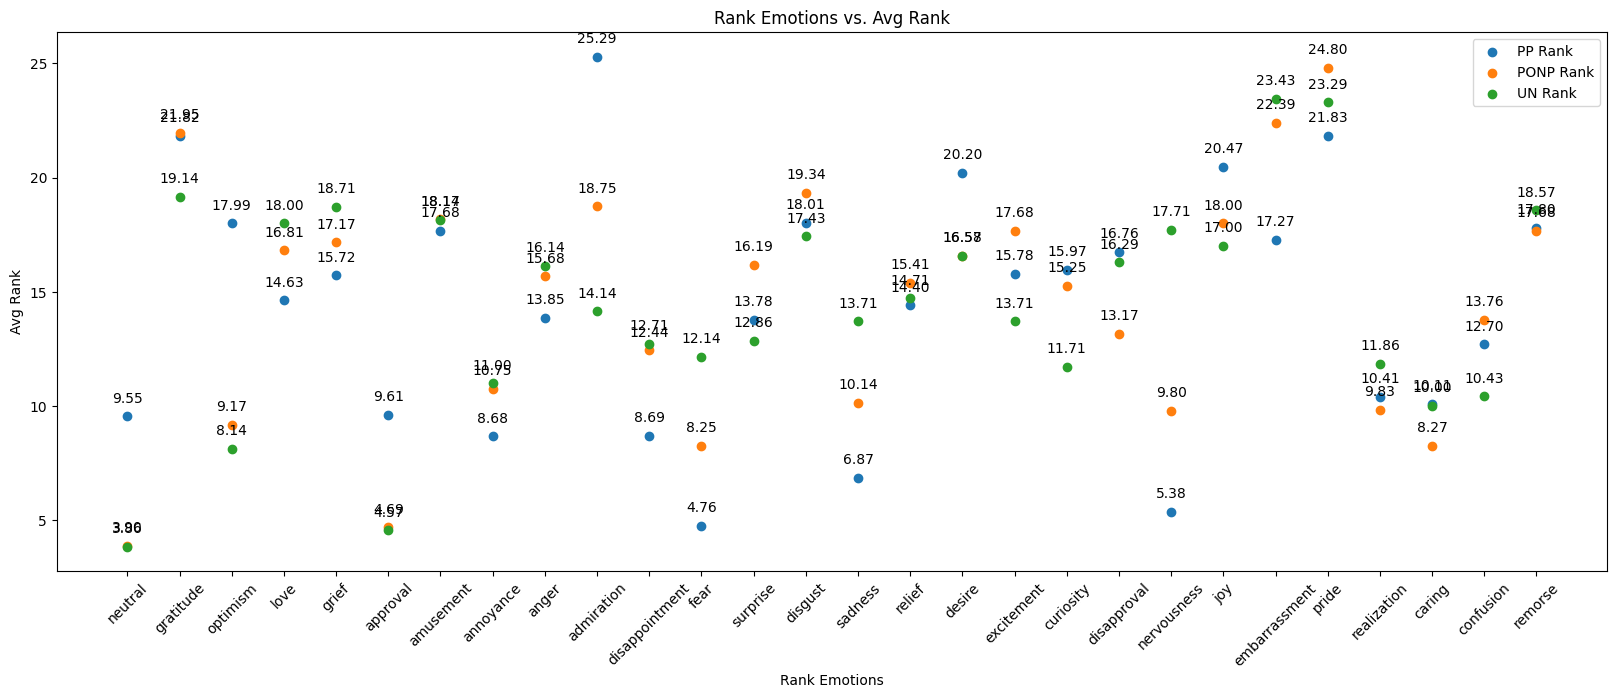

In [53]:
x = rank_df['Emotions']
y_PP = rank_df['PP']
y_PONP = rank_df['PONP']
y_UN = rank_df['UN']

plt.figure(figsize=(20,7))

plt.scatter(x, y_PP, label='PP Rank')
plt.scatter(x, y_PONP, label='PONP Rank')
plt.scatter(x, y_UN, label='UN Rank')

plt.xlabel('Rank Emotions')
plt.ylabel('Avg Rank')
plt.title('Rank Emotions vs. Avg Rank')
plt.xticks(rotation=45)

# Add text annotations for the values (remove this if dont want values)
for i in range(len(x)):
    plt.annotate(f'{y_PP[i]:.2f}', (x[i], y_PP[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_PONP[i]:.2f}', (x[i], y_PONP[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_UN[i]:.2f}', (x[i], y_UN[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()

plt.show()

## Emotions vs Prob Plot for 3 labels

In [54]:
df

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,sadness,surprise,neutral,emo_label_prob,label,top_five_emolabelprob,topfive_emo_labels,all_emolabelprob,all_emo_labels,all_emo_label_rank
0,0.000059,0.000267,0.001160,0.023139,0.003082,0.000567,0.000618,0.000323,0.000083,0.024538,...,0.010215,0.000147,0.002682,"{'admiration': 5.9294165e-05, 'amusement': 0.0...",PP,"[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm...","[(embarrassment, 0.7947152), (nervousness, 0.0...","[embarrassment, nervousness, fear, disappointm...","{'embarrassment': 1, 'nervousness': 2, 'fear':..."
1,0.000160,0.000063,0.001678,0.000607,0.001919,0.930200,0.000352,0.000144,0.000059,0.000139,...,0.000201,0.000157,0.003289,"{'admiration': 0.00016007239, 'amusement': 6.3...",PONP,"[(caring, 0.93020034), (fear, 0.04762121), (re...","[caring, fear, relief, nervousness, neutral]","[(caring, 0.93020034), (fear, 0.04762121), (re...","[caring, fear, relief, nervousness, neutral, a...","{'caring': 1, 'fear': 2, 'relief': 3, 'nervous..."
2,0.000535,0.000172,0.000043,0.000637,0.706703,0.001081,0.000261,0.000408,0.001219,0.000122,...,0.000080,0.000223,0.189041,"{'admiration': 0.000534939, 'amusement': 0.000...",PP,"[(approval, 0.7067033), (neutral, 0.18904075),...","[approval, neutral, optimism, realization, joy]","[(approval, 0.7067033), (neutral, 0.18904075),...","[approval, neutral, optimism, realization, joy...","{'approval': 1, 'neutral': 2, 'optimism': 3, '..."
3,0.000313,0.000563,0.000073,0.001056,0.066868,0.000340,0.000805,0.000177,0.000083,0.002363,...,0.001890,0.003335,0.761554,"{'admiration': 0.0003127861, 'amusement': 0.00...",PONP,"[(neutral, 0.7615538), (realization, 0.1340531...","[neutral, realization, approval, fear, nervous...","[(neutral, 0.7615538), (realization, 0.1340531...","[neutral, realization, approval, fear, nervous...","{'neutral': 1, 'realization': 2, 'approval': 3..."
4,0.000105,0.000022,0.000070,0.000051,0.000550,0.988513,0.000092,0.000182,0.000086,0.000019,...,0.000058,0.000054,0.007397,"{'admiration': 0.000105462284, 'amusement': 2....",PONP,"[(caring, 0.9885125), (neutral, 0.007396732), ...","[caring, neutral, relief, optimism, approval]","[(caring, 0.9885125), (neutral, 0.007396732), ...","[caring, neutral, relief, optimism, approval, ...","{'caring': 1, 'neutral': 2, 'relief': 3, 'opti..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.002664,0.000210,0.000016,0.000250,0.829980,0.002634,0.001490,0.032728,0.001017,0.000189,...,0.000126,0.007467,0.047769,"{'admiration': 0.0026642256, 'amusement': 0.00...",PONP,"[(approval, 0.82997984), (neutral, 0.047768757...","[approval, neutral, realization, curiosity, ex...","[(approval, 0.82997984), (neutral, 0.047768757...","[approval, neutral, realization, curiosity, ex...","{'approval': 1, 'neutral': 2, 'realization': 3..."
156,0.000013,0.000076,0.000474,0.000917,0.000119,0.000508,0.003064,0.990775,0.000101,0.000622,...,0.001194,0.000117,0.000604,"{'admiration': 1.2816753e-05, 'amusement': 7.6...",PP,"[(curiosity, 0.9907747), (confusion, 0.0030644...","[curiosity, confusion, sadness, annoyance, dis...","[(curiosity, 0.9907747), (confusion, 0.0030644...","[curiosity, confusion, sadness, annoyance, dis...","{'curiosity': 1, 'confusion': 2, 'sadness': 3,..."
157,0.000087,0.000111,0.000689,0.000157,0.001138,0.981478,0.000224,0.000403,0.000247,0.000048,...,0.001371,0.000064,0.002102,"{'admiration': 8.681e-05, 'amusement': 0.00011...",PONP,"[(caring, 0.9814777), (fear, 0.0071420358), (g...","[caring, fear, grief, neutral, sadness]","[(caring, 0.9814777), (fear, 0.0071420358), (g...","[caring, fear, grief, neutral, sadness, approv...","{'caring': 1, 'fear': 2, 'grief': 3, 'neutral'..."
158,0.000231,0.000260,0.000421,0.002901,0.445039,0.001604,0.000474,0.000166,0.000227,0.003454,...,0.002566,0.002660,0.009144,"{'admiration': 0.00023126583, 'amusement': 0.0...

In [55]:
df.describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.005661,0.019742,0.045333,0.013398,0.064221,0.088187,0.011078,0.063962,0.011959,0.010563,...,0.006151,0.158450,0.004577,0.002788,0.023763,0.007524,0.000644,0.043102,0.014581,0.109811
std,0.048883,0.113225,0.184550,0.042211,0.150800,0.253270,0.050940,0.217628,0.088732,0.056384,...,0.069209,0.260090,0.015972,0.021935,0.091795,0.032030,0.001521,0.152846,0.100930,0.244017
min,0.000006,0.000019,0.000011,0.000042,0.000027,0.000017,0.000020,0.000003,0.000009,0.000016,...,0.000012,0.000003,0.000014,0.000001,0.000010,0.000004,0.000005,0.000024,0.000015,0.000019
25%,0.000028,0.000080,0.000136,0.000321,0.000519,0.000458,0.000190,0.000104,0.000086,0.000303,...,0.000144,0.000470,0.000125,0.000025,0.000249,0.000093,0.000104,0.000548,0.000119,0.000740
50%,0.000080,0.000196,0.000316,0.000859,0.002680,0.001561,0.000457,0.000342,0.000215,0.001332,...,0.000340,0.010768,0.000437,0.000077,0.001216,0.000443,0.000260,0.001863,0.000335,0.003459
75%,0.000228,0.000597,0.001214,0.004715,0.031267,0.008461,0.001620,0.001340,0.000417,0.004652,...,0.000653,0.196746,0.001763,0.000231,0.009874,0.002179,0.000545,0.010193,0.001222,0.057774
max,0.583287,0.983002,0.979322,0.245341,0.829980,0.994096,0.506019,0.992313,0.788958,0.606994,...,0.875964,0.949900,0.163170,0.247250,0.995248,0.242034,0.012150,0.984065,0.993192,0.989211


In [56]:
dict(sorted(dict(df.loc[:, 'admiration':'neutral'].describe().loc['mean']).items(), key=operator.itemgetter(1)))

{'remorse': 0.000644147277629375,
 'grief': 0.00194084823744625,
 'excitement': 0.002581273353196875,
 'pride': 0.002788234419965,
 'optimism': 0.004576873617965624,
 'joy': 0.004735626886796875,
 'disgust': 0.0053223148703843755,
 'admiration': 0.005661154776685,
 'love': 0.006150829649375,
 'embarrassment': 0.006266557946943749,
 'relief': 0.007524138352220625,
 'disappointment': 0.01056293182140625,
 'confusion': 0.011077845812943752,
 'desire': 0.011959174920675001,
 'annoyance': 0.013398390274625,
 'surprise': 0.014580684005687499,
 'gratitude': 0.017878581413133747,
 'disapproval': 0.01908252038955625,
 'amusement': 0.0197424156950625,
 'realization': 0.02376278889405625,
 'sadness': 0.0431020644524,
 'anger': 0.045333454261156245,
 'curiosity': 0.06396175021274,
 'approval': 0.0642212769287875,
 'caring': 0.08818713574139374,
 'neutral': 0.10981116428260626,
 'nervousness': 0.15845036371301874,
 'fear': 0.2366954559194625}

In [57]:
PP_prob = dict(sorted(dict(df[df['label'] == 'PP'].loc[:, 'admiration':'neutral'].describe().loc['mean']).items(), key=operator.itemgetter(1)))
PONP_prob = dict(sorted(dict(df[df['label'] == 'PONP'].loc[:, 'admiration':'neutral'].describe().loc['mean']).items(), key=operator.itemgetter(1)))
UN_prob = dict(sorted(dict(df[df['label'] == 'UN'].loc[:, 'admiration':'neutral'].describe().loc['mean']).items(), key=operator.itemgetter(1)))

In [59]:
print(PP_prob)
print(PONP_prob)
print(UN_prob)

{'desire': 0.00032865241674468083, 'remorse': 0.0007788739101563827, 'optimism': 0.0015727693904202132, 'admiration': 0.002228672767729787, 'grief': 0.0029965633774468084, 'pride': 0.003346238825146808, 'excitement': 0.003645548340664893, 'disapproval': 0.00552118833630851, 'joy': 0.007659124314303192, 'relief': 0.008535299321712767, 'disgust': 0.008682310988595746, 'love': 0.010151573494914894, 'embarrassment': 0.010447999245234041, 'surprise': 0.013397415751499997, 'disappointment': 0.014195764314138302, 'annoyance': 0.014845963562202129, 'gratitude': 0.015812471620270215, 'confusion': 0.016984181586425534, 'realization': 0.02241103227902128, 'caring': 0.027375833250308512, 'amusement': 0.031041271393425527, 'approval': 0.03945460057687234, 'sadness': 0.04123010489211702, 'neutral': 0.0451973589280532, 'anger': 0.05105920973287234, 'curiosity': 0.0742013222641702, 'nervousness': 0.21250067214192553, 'fear': 0.31439797984573403}
{'embarrassment': 0.0003331575826271186, 'grief': 0.0004

In [60]:
# Get the unique set of keys from all dictionaries
all_keys = set(PP_prob.keys()).union(PONP_prob.keys(), UN_prob.keys())  # get all emotions (keys) common in all 3

# Create a dictionary with the combined data
combined_dict = {
    "Emotions": list(all_keys),
    "UN": [UN_prob.get(key, 0) for key in all_keys],  # Put value if key is present else put 0
    "PP": [PP_prob.get(key, 0) for key in all_keys],
    "PONP": [PONP_prob.get(key, 0) for key in all_keys]
}

# Create the DataFrame
prob_df = pd.DataFrame(combined_dict)

# Print the DataFrame
prob_df

,Emotions,UN,PP,PONP
0,gratitude,0.136576,0.015812,0.007088
1,optimism,0.005281,0.001573,0.009280
2,neutral,0.203735,0.045197,0.201612
3,love,0.000363,0.010152,0.000463
4,grief,0.000316,0.002997,0.000452
5,approval,0.077813,0.039455,0.102067
6,amusement,0.000488,0.031041,0.004025
7,annoyance,0.004237,0.014846,0.012179
8,anger,0.090030,0.051059,0.030908
9,admiration,0.002274,0.002229,0.011532


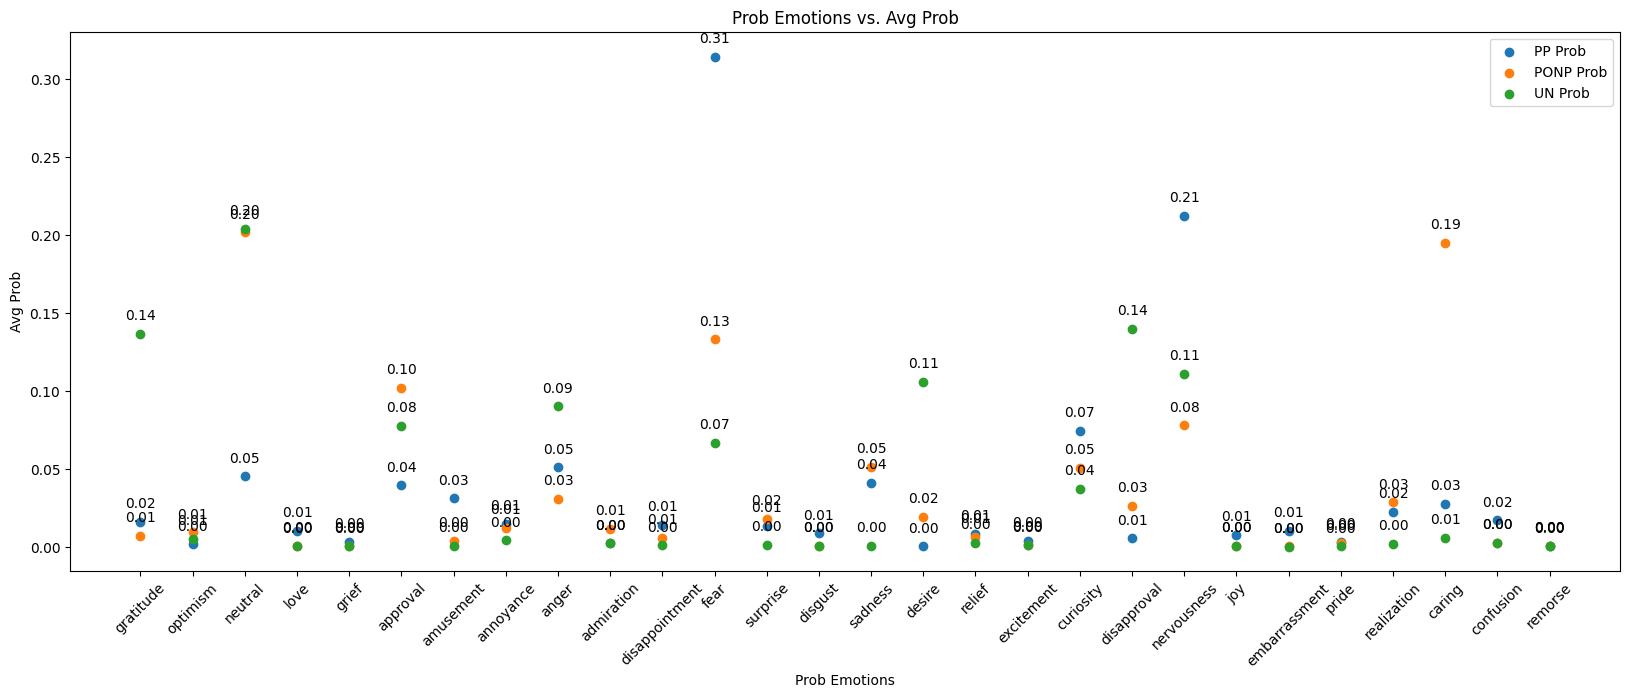

In [61]:
x = prob_df['Emotions']
y_PP = prob_df['PP']
y_PONP = prob_df['PONP']
y_UN = prob_df['UN']

plt.figure(figsize=(20,7))

plt.scatter(x, y_PP, label='PP Prob')
plt.scatter(x, y_PONP, label='PONP Prob')
plt.scatter(x, y_UN, label='UN Prob')

plt.xlabel('Prob Emotions')
plt.ylabel('Avg Prob')
plt.title('Prob Emotions vs. Avg Prob')
plt.xticks(rotation=45)

# Add text annotations for the values (remove this if dont want values)
for i in range(len(x)):
    plt.annotate(f'{y_PP[i]:.2f}', (x[i], y_PP[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_PONP[i]:.2f}', (x[i], y_PONP[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{y_UN[i]:.2f}', (x[i], y_UN[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()

plt.show()